In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam,SGD
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD

from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("data_train.csv",names=["label","sentenc"])
data
X=data.sentenc.values
Y=data.label.values
label_encoder=LabelEncoder()
Y=label_encoder.fit_transform(Y)

In [3]:
data_real_test=pd.read_csv("data_test.csv",names=["label","sentenc"])
X_test_real=data_real_test.sentenc.values
Y_test_real=data_real_test.label.values
Y_test_real=label_encoder.transform(Y_test_real)


In [69]:
# from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(Y),
#                                                  Y)

In [70]:
# class_weights

In [4]:
w=data.label.value_counts()/data.label.value_counts().sum()

In [5]:
w=data.label.value_counts()/data.label.value_counts().sum()
class_wieght={}
for i in range(len(w.index)):
    class_wieght[label_encoder.transform([w.index[i]])[0]]=1-w[w.index[i]]


In [6]:
class_wieght

{5: 0.40877162926160704,
 0: 0.8438410142196333,
 1: 0.9037176631831421,
 2: 0.9309576837416481,
 3: 0.9495459996573582,
 4: 0.9631660099366113}

In [74]:
model = Sequential()
model.add(Dense(10,activation='tanh',input_shape=(64404,)))
model.add(Dense(7,activation='sigmoid'))
model.add(Dense(6,activation='softmax'))
sgd = SGD(lr=0.1,momentum=0.0,nesterov = False)
model.compile(optimizer =sgd,loss = 'categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                644050    
_________________________________________________________________
dense_31 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_32 (Dense)             (None, 6)                 48        
Total params: 644,175
Trainable params: 644,175
Non-trainable params: 0
_________________________________________________________________


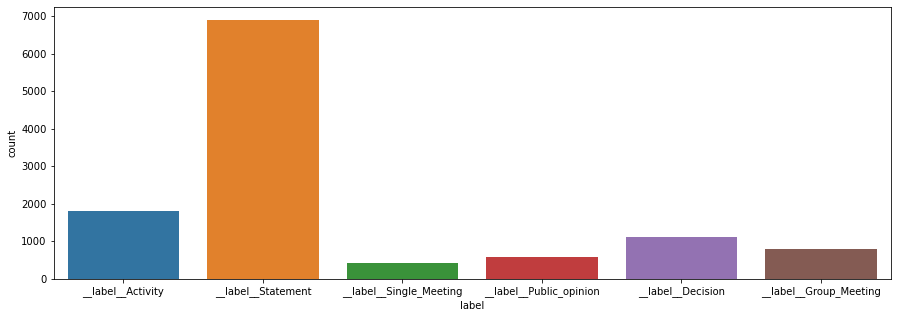

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=data)

In [8]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=50)

In [ ]:

model=Pipeline([("preprocess",TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}',ngram_range=(1,4), max_features=2000)),("svd",TruncatedSVD(n_components=1000, n_iter=100, random_state=42)),("model",classifier)])

In [30]:
model=Pipeline([("preprocess",TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}',ngram_range=(1,4), max_features=2000)),("model",SVC(kernel="rbf",C=9,class_weight=class_wieght,gamma=0.15))])

In [126]:
model=Pipeline([("preprocess",TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}',ngram_range=(1,4), max_features=2500)),("model",RidgeClassifier(alpha=0.3,class_weight=class_wieght,fit_intercept=False,tol=0.8e-1
                                                                                                                                                      ))])

In [10]:
import numpy as np
import math

# labels_dict : {ind_label: count_label}
# mu : parameter to tune 

def create_class_weight(labels_dict,mu=0.15):
    total = np.sum(list(labels_dict.values()))
    keys = labels_dict.keys()
    class_weight = dict()
    
    for key in keys:
        score = math.log(mu*total/float(labels_dict[key]))
        class_weight[key] = score if score > 1.0 else 1.0
    
    return class_weight
labels_dict = {0: 2813, 1: 78, 2: 2814, 3: 78, 4: 7914, 5: 248, 6: 7914, 7: 248}

create_class_weight(labels_dict)

{0: 1.0,
 1: 3.749820767859636,
 2: 1.0,
 3: 3.749820767859636,
 4: 1.0,
 5: 2.5931008483842453,
 6: 1.0,
 7: 2.5931008483842453}

In [136]:
import keras

In [37]:

from sklearn.model_selection import GridSearchCV
param_grid = {'model__C': [3,4,5,6,7,8],"model__gamma":[0.1,0.2,0.25,0.30,0.35,0.4] }
# # param_grid = {'model__C':[0.01,0.1,1.0,10]
# # 
# # }

grid = GridSearchCV(model, param_grid, cv=2)

In [178]:
import keras
def create_network():
    network = Sequential()
    network.add(Dense(20, activation='relu', kernel_initializer='random_normal', input_dim=933813 ))
    network.add(Dense(10, activation='relu', kernel_initializer='random_normal'))
    network.add(Dense(5, activation='softmax'))

    network.compile(loss='categorical_crossentropy', 
                    optimizer='adam', 
                    metrics=['accuracy']) 
    
def build_model():
     
    model = Sequential()
    model.add(Dense(25, input_dim=1500, activation='tanh'))
    model.add(Dropout(0.8))


    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model
print("Compile model ...")
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
estimator = KerasClassifier(build_fn=build_model, epochs=70, batch_size=8,validation_data=(X_TEST,dummy_y_test),callbacks=[callback])

Compile model ...


In [179]:
from sklearn.preprocessing import OneHotEncoder

In [180]:
Y_train_one_hot=OneHotEncoder().fit_transform(Y_train.reshape(-1,1))

In [181]:
Y_train_one_hot

<8171x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8171 stored elements in Compressed Sparse Row format>

In [182]:
# model.fit(c,Y_train_one_hot,epochs=5)

In [184]:
hist=estimator.fit(X_TRAIN,dummy_y_train)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 25)                37525     
_________________________________________________________________
dropout_38 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 6)                 156       
Total params: 37,681
Trainable params: 37,681
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
1022/1022 [==============================] - 2s 2ms/step - loss: 1.3431 - accuracy: 0.5742 - val_loss: 0.9034 - val_accuracy: 0.7248
Epoch 2/70
1022/1022 [==============================] - 2s 2ms/step - loss: 0.9332 - accuracy: 0.7129 - val_loss: 0.7584 - val_accuracy: 0.7619
Epoch 3/70
1022/1022 [==============================] - 2s 2ms/step - loss: 0.8068 - accura

C:\Users\khaled.15\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


train 0.8675804675070371
test 0.8004567513559806


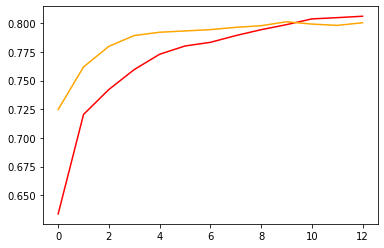

In [185]:
predict_train=estimator.predict(X_TRAIN)
predict_test=estimator.predict(X_TEST)
print("train",metrics.accuracy_score(predict_train,Y_train))
print("test",metrics.accuracy_score(predict_test,y_test))
plt.plot(hist.history['accuracy'],color="red")
plt.plot(hist.history['val_accuracy'],color="orange")


In [ ]:
# import pickle
# with open("neural_network_80.pickle","wb") as file:
#     pickle.dump(estimator,file)

In [ ]:
json_model = estimator.model.to_json()
open('model_architecture.json', 'w').write(json_model)
# saving weights
estimator.model.save_weights('model_weights.h5', overwrite=True)
estimator.model.save_weights('model_weights.h5', overwrite=True)

In [ ]:
# loading model
from keras.models import model_from_json

model = model_from_json(open('model_architecture.json').read())
model.load_weights('model_weights.h5')

# dont forget to compile your model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
# keras.models.save_model("neural_network_80",estimator)

In [13]:
from keras.wrappers.scikit_learn import KerasClassifier


In [40]:
classifier = KerasClassifier(build_fn=create_network, 
                                 epochs=5, 
                                 batch_size=100, 
                                 verbose=0)

In [139]:
tfidf=TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}',ngram_range=(1,3), max_features=1500)

In [140]:
X_TRAIN=tfidf.fit_transform(X_train).astype("float16")
X_TEST=tfidf.transform(x_test).astype("float16")


In [141]:
X_TEST_REAL=tfidf.transform(X_test_real).astype("float16")

In [124]:
X_TRAIN

<8171x3000 sparse matrix of type '<class 'numpy.float16'>'
	with 381301 stored elements in Compressed Sparse Row format>

In [99]:
Y_train_one_hot.shape

(8171, 6)

In [19]:
from keras.utils import np_utils
dummy_y_train = np_utils.to_categorical(Y_train)
dummy_y_test=np_utils.to_categorical(y_test)
dummy_y_test_real=np_utils.to_categorical(Y_test_real)

In [91]:
c.shape

(8171, 64404)

In [ ]:
X_TEST=

In [102]:
# model.fit(c,Y_train)

In [120]:
predict_train

array([0, 1, 5, ..., 2, 5, 5])

In [103]:
# XX=TruncatedSVD(n_components=1000, n_iter=100, random_state=42).fit_transform(X)

In [406]:
predict_train=estimator.predict(X_TRAIN)
predict_test=estimator.predict(X_TEST)
print("train",metrics.accuracy_score(predict_train,Y_train))
print("test",metrics.accuracy_score(predict_test,y_test))

C:\Users\khaled.15\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


train 0.8508138538734549
test 0.8007422209534685


In [407]:
predict_test_real=estimator.predict(X_TEST_REAL)
# print("train",metrics.accuracy_score(predict_train,Y_train))
print("test",metrics.accuracy_score(predict_test_real,Y_test_real))

C:\Users\khaled.15\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


test 0.8080767692922831


In [408]:
print(metrics.classification_report(predict_test_real, Y_test_real))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75       658
           1       0.58      0.83      0.68       298
           2       0.43      0.85      0.57       194
           3       0.33      0.90      0.48        89
           4       0.82      0.97      0.89       170
           5       0.95      0.79      0.87      3593

    accuracy                           0.81      5002
   macro avg       0.64      0.86      0.71      5002
weighted avg       0.86      0.81      0.82      5002



In [94]:
from sklearn.model_selection import GridSearchCV
param_grid = {'model__C': [1, 1.5, 2.0, 3.0, 5.0],
              'model__gamma': [0.1, 0.3, 0.5, 0.7, 0.9], }
# param_grid = {'model__C':[0.01,0.1,1.0,10]
# }

grid = GridSearchCV(model, param_grid, cv = 5)

In [95]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        TfidfVectorizer(max_features=2000,
                                                        ngram_range=(1, 3),
                                                        token_pattern='\\w{1,}')),
                                       ('model',
                                        SVC(class_weight={0: 0.8438410142196333,
                                                          1: 0.9037176631831421,
                                                          2: 0.9309576837416481,
                                                          3: 0.9495459996573582,
                                                          4: 0.9631660099366113,
                                                          5: 0.40877162926160704}))]),
             param_grid={'model__C': [1, 1.5, 2.0, 3.0, 5.0],
                         'model__gamma': [0.1, 0.3, 0.5, 0.7, 0.9]})

In [98]:
grid.best_params_

{'model__C': 3.0, 'model__gamma': 0.9}

In [40]:
# grid.best_params_

{'model__C': 0.1}

In [411]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(estimator, X_train, Y_train, cv=5)

In [18]:
scores

array([0.81590214, 0.80171359, 0.8121175 , 0.80905753, 0.79130967])

In [138]:
import pickle
with open("SVM_80.pickle","wb") as f:
    pickle.dump(model,f)

In [21]:
import pickle
with open("Label_encoder_for_svm.pickle","wb") as f:
    pickle.dump(label_encoder,f)